In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image

from PIL import Image

import seaborn as sns
import plotly.express as px

from pathlib import Path

import os

import tensorflow as tf
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

# **Create the train data**

In [2]:
#train_dir = tf.io.gfile.glob("/kaggle/input/crack123/DBCC_Training_Data_Set/train/*")
#for i in train_dir:
    #print(i)

In [2]:
train = pd.read_csv('/kaggle/input/crack123/DBCC_Training_Data_Set/train.txt', sep=" ", header=None)
train.columns = ["Name", "label",]

In [3]:
#convert dataframe to list
train_list =  list(train["Name"]) 

In [4]:
train_list[0]

'no1.jpeg'

In [14]:
train_new = []
for i in train_list:
    new = "/kaggle/input/crack123/DBCC_Training_Data_Set/train/" + i
    train_new.append(new)
    print(new)
#print(train_new)

/kaggle/input/crack123/DBCC_Training_Data_Set/train/no1.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no2.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no3.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no4.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no5.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no6.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no7.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no8.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no9.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no10.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no11.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no12.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no13.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no14.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no15.jpeg
/kaggle/input/crack123/DBCC_Training_Data_Set/train/no16.jpeg
/kaggle/input/cra

In [13]:
with pd.option_context("display.max_colwidth", 234):
    train_df = pd.DataFrame(train_new, columns = ["filename"])
train_df

,filename
0,/kaggle/input/crack123/DBCC_Training_Data_Set/...
1,/kaggle/input/crack123/DBCC_Training_Data_Set/...
2,/kaggle/input/crack123/DBCC_Training_Data_Set/...
3,/kaggle/input/crack123/DBCC_Training_Data_Set/...
4,/kaggle/input/crack123/DBCC_Training_Data_Set/...
...,...
49995,/kaggle/input/crack123/DBCC_Training_Data_Set/...
49996,/kaggle/input/crack123/DBCC_Training_Data_Set/...
49997,/kaggle/input/crack123/DBCC_Training_Data_Set/...
49998,/kaggle/input/crack123/DBCC_Training_Data_Set/...


In [8]:
train_df['label']= train['label']

In [9]:
train_df

,filename,label
0,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
1,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
2,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
3,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
4,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
...,...,...
49995,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1
49996,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1
49997,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1
49998,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1


In [10]:
train_df['label'] = train_df['label'].replace({0: 'Normal',1:'Crack'})

In [11]:
train_df

,filename,label
0,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
1,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
2,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
3,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
4,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
...,...,...
49995,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Crack
49996,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Crack
49997,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Crack
49998,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Crack


# **Create the test data**

In [12]:
#test_dir = tf.io.gfile.glob("/kaggle/input/crack123/DBCC_Training_Data_Set/val/*")
#for i in test_dir:
    #print(i)

In [13]:
test = pd.read_csv('/kaggle/input/crack123/DBCC_Training_Data_Set/val.txt', sep=" ", header=None)
test.columns = ["Name", "label",]

In [14]:
#convert dataframe to list
test_list =  list(test["Name"]) 

In [15]:
test_list[0]

'no1.jpeg'

In [16]:
test_new = []
for i in test_list:
    newnew = "/kaggle/input/crack123/DBCC_Training_Data_Set/val/" + i
    test_new.append(newnew)

In [17]:
with pd.option_context("display.max_colwidth", None):
    test_df = pd.DataFrame(test_new, columns = ["filename"])
print(test_df)

                                               filename
0     /kaggle/input/crack123/DBCC_Training_Data_Set/...
1     /kaggle/input/crack123/DBCC_Training_Data_Set/...
2     /kaggle/input/crack123/DBCC_Training_Data_Set/...
3     /kaggle/input/crack123/DBCC_Training_Data_Set/...
4     /kaggle/input/crack123/DBCC_Training_Data_Set/...
...                                                 ...
4995  /kaggle/input/crack123/DBCC_Training_Data_Set/...
4996  /kaggle/input/crack123/DBCC_Training_Data_Set/...
4997  /kaggle/input/crack123/DBCC_Training_Data_Set/...
4998  /kaggle/input/crack123/DBCC_Training_Data_Set/...
4999  /kaggle/input/crack123/DBCC_Training_Data_Set/...

[5000 rows x 1 columns]


In [18]:
test_df['label']= test['label']

In [19]:
test_df

,filename,label
0,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
1,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
2,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
3,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
4,/kaggle/input/crack123/DBCC_Training_Data_Set/...,0
...,...,...
4995,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1
4996,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1
4997,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1
4998,/kaggle/input/crack123/DBCC_Training_Data_Set/...,1


In [20]:
test_df['label'] = test_df['label'].replace({0: 'Normal',1:'Crack'})

In [21]:
test_df.head()

,filename,label
0,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
1,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
2,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
3,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal
4,/kaggle/input/crack123/DBCC_Training_Data_Set/...,Normal


# **-------------- CNN Model --------------**

In [22]:
# Paremeter Setting
## image_widht
image_widht = 16
## image_height
image_height = 16
## image_color_channel_size
image_color_channel_size = 255
## image_size
image_size = (image_widht, image_height)
## batch_size
batch_size = 8
## epochs
epochs = 20
## learning_rate
learning_rate = 0.01
## class_names
class_names = ['Normal','Crack']

# **Loading Image and Rescaling**

In [23]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./image_color_channel_size,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./image_color_channel_size
)

In [24]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_data = test_gen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False,
    #seed=42
)

Found 40000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# **Training Model**

In [25]:
inputs = tf.keras.Input(shape=(16,16,3))
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(2, 2), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    batch_size=batch_size,
)

Epoch 1/20
5000/5000 [==============================] - 155s 30ms/step - loss: 0.1105 - accuracy: 0.9727 - val_loss: 0.0318 - val_accuracy: 0.9995
Epoch 2/20
5000/5000 [==============================] - 58s 12ms/step - loss: 0.0842 - accuracy: 0.9811 - val_loss: 0.0179 - val_accuracy: 0.9977
Epoch 3/20
5000/5000 [==============================] - 58s 12ms/step - loss: 0.0764 - accuracy: 0.9831 - val_loss: 0.0125 - val_accuracy: 0.9987
Epoch 4/20
5000/5000 [==============================] - 58s 12ms/step - loss: 0.0720 - accuracy: 0.9832 - val_loss: 0.0184 - val_accuracy: 0.9992
Epoch 5/20
5000/5000 [==============================] - 56s 11ms/step - loss: 0.0691 - accuracy: 0.9843 - val_loss: 0.0373 - val_accuracy: 0.9946
Epoch 6/20
5000/5000 [==============================] - 57s 11ms/step - loss: 0.0686 - accuracy: 0.9844 - val_loss: 0.0375 - val_accuracy: 0.9950
Epoch 7/20
5000/5000 [==============================] - 57s 11ms/step - loss: 0.0698 - accuracy: 0.9844 - val_loss: 0.0234 

# **Results and Predictions**

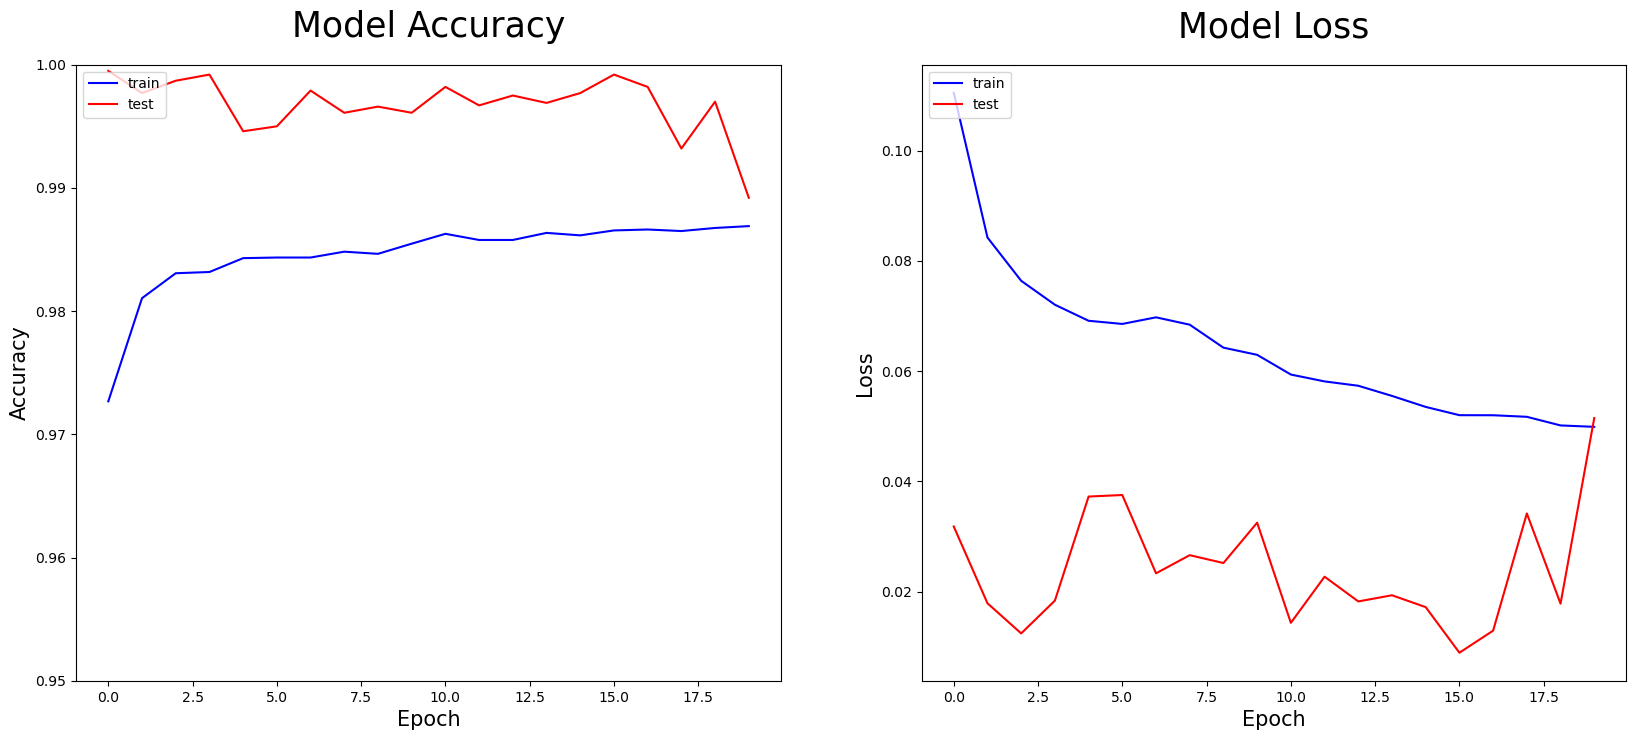

In [100]:
plt.figure(figsize=[20,8])


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r')
plt.title('Model Accuracy', size=25, pad=20)
plt.ylim(0.95, 1)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

625/625 [==============================] - 5s 8ms/step - loss: 0.0636 - accuracy: 0.9834
Model Accuracy: 98.34%
Model Loss: 0.06
625/625 [==============================] - 5s 8ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


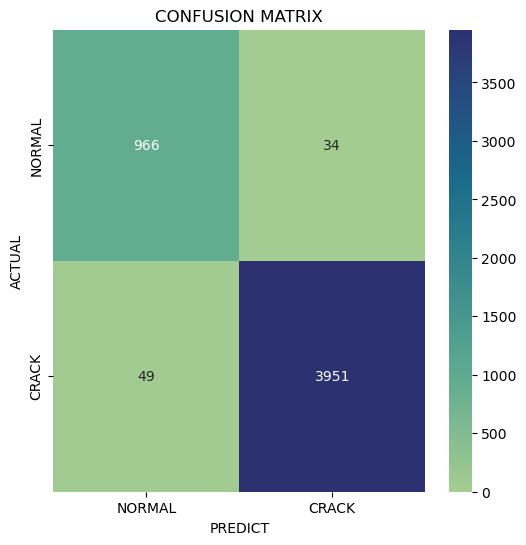

ClASSIFICATION REPORT:
----------------------
               precision    recall  f1-score   support

      NORMAL       0.95      0.97      0.96      1000
       CRACK       0.99      0.99      0.99      4000

    accuracy                           0.98      5000
   macro avg       0.97      0.98      0.97      5000
weighted avg       0.98      0.98      0.98      5000



In [39]:
result = model.evaluate(test_data)
loss = result[0]
acc = result[1]

print('Model Accuracy: {:0.2f}%' .format(acc*100))
print('Model Loss: {:0.2f}' .format(loss))

y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
cm = confusion_matrix(test_data.labels, y_pred)
clr = classification_report(test_data.labels, y_pred, target_names=["NORMAL", "CRACK"])
    
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt= 'g', vmin=0, cmap='crest')
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NORMAL", "CRACK"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NORMAL", "CRACK"])
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()
print("ClASSIFICATION REPORT:\n----------------------\n", clr)

In [89]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)
sample_images = sample_generator.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=45
)

Found 5000 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


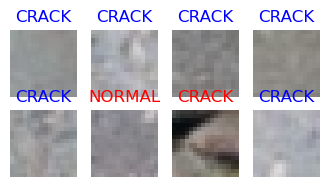

In [92]:
samples = sample_images.next()
labels = samples[1].astype(np.int)

plt.figure(figsize=(4,4))

for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("CRACK" if y_pred[i] == 1 else "NORMAL"), color=("blue" if labels[i] == y_pred[i] else "red"))

--------------------